In [0]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [0]:
x = tf.Variable(3, name='x')
y = tf.Variable(4, name='y')
f = x*x*y+y+2

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  init.run()
  result = f.eval()
print(result)

42


In [0]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


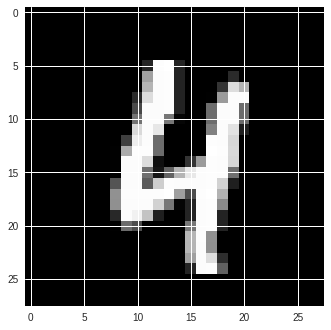

[4]


In [0]:
batch_xs, batch_ys = mnist.test.next_batch(1)
two_d = (np.reshape(batch_xs, (28, 28)) * 255).astype(np.uint8)
plt.imshow(two_d, 'gray',interpolation='nearest')
plt.show()
print(batch_ys)

In [0]:
def dense_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        #initializer = tf.contrib.layers.xavier_initializer()
        init=tf.truncated_normal((n_inputs,n_neurons), stddev=2/np.sqrt(n_inputs))
        w = tf.Variable(init, name="weights")
        b = tf.Variable(tf.zeros([n_neurons]), name = "biases")
        z = tf.matmul(X, w) + b
        if activation:
            return tf.nn.relu(z)
        else:
            return z

In [0]:
X = tf.placeholder(tf.float32, (None, 28*28), name="X")
y = tf.placeholder(tf.int64, (None), name="y")

with tf.name_scope("dnn"):
  layer1 = dense_layer(X, 300, "hidden1", activation = True)
  layer2 = dense_layer(layer1, 100, "hidden2", activation = True)
  logits = dense_layer(layer2, 10, "logits")

In [0]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [0]:
with tf.name_scope("train"):
  learning_rate = 0.01
  optimizer=tf.train.GradientDescentOptimizer(learning_rate)
  training_op=optimizer.minimize(loss)

In [0]:
with tf.name_scope("eval"):
  correct= tf.nn.in_top_k(logits, y, 1)
  accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
  conf = tf.reduce_max(tf.nn.softmax(logits, axis=1), axis=1)

  tf.summary.scalar("Accuracy", accuracy)



In [0]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()
merged = tf.summary.merge_all()

In [0]:
from datetime import datetime
n_epochs = 40
batch_size = 50

with tf.Session() as sess:
    # Cria os arquivos do tensorboard
    now = datetime.utcnow()
    train_writer = tf.summary.FileWriter('logdir/train-{}'.format(now),sess.graph)
    test_writer = tf.summary.FileWriter('logdir/test-{}'.format(now))
    
    # Inicia as variáveis do tensorflow
    init.run()
    
    for epoch in range(n_epochs):
    
        # Itera n baches do dataset
        for iteration in range(mnist.train.num_examples//batch_size):
            X_batch, y_batch=mnist.train.next_batch(batch_size)
            sess.run(training_op,feed_dict={X:X_batch,y:y_batch})
            
        # Adiciona as métricas para o Tensorboar
        train_writer.add_summary(merged.eval(feed_dict={X:X_batch,y:y_batch}),epoch)
        test_writer.add_summary(merged.eval(feed_dict={X:mnist.test.images,y:mnist.test.labels}),epoch)

        # Calcula métricas de acurácia para acompanhar o treinamento
        acc_train=accuracy.eval(feed_dict={X:X_batch,y:y_batch})
        acc_test=accuracy.eval(feed_dict={X:mnist.test.images,y:mnist.test.labels})
        print(epoch,"Train accuracy:",acc_train,"Test accuracy:",acc_test)
        
        # Salva os checkpoits por cada Época
        save_path=saver.save(sess,"./logdir/my_model_final.ckpt")

0 Train accuracy: 0.88 Test accuracy: 0.9069
1 Train accuracy: 0.94 Test accuracy: 0.9277
2 Train accuracy: 0.98 Test accuracy: 0.9377
3 Train accuracy: 0.94 Test accuracy: 0.9427
4 Train accuracy: 1.0 Test accuracy: 0.9483
5 Train accuracy: 0.96 Test accuracy: 0.9531
6 Train accuracy: 0.96 Test accuracy: 0.9546
7 Train accuracy: 0.98 Test accuracy: 0.957
8 Train accuracy: 0.98 Test accuracy: 0.9604
9 Train accuracy: 0.96 Test accuracy: 0.9618
10 Train accuracy: 0.96 Test accuracy: 0.9638
11 Train accuracy: 0.96 Test accuracy: 0.9648
12 Train accuracy: 1.0 Test accuracy: 0.9661
13 Train accuracy: 1.0 Test accuracy: 0.9681
14 Train accuracy: 0.96 Test accuracy: 0.9686
15 Train accuracy: 0.96 Test accuracy: 0.9687
16 Train accuracy: 0.98 Test accuracy: 0.9711
17 Train accuracy: 0.98 Test accuracy: 0.9711
18 Train accuracy: 0.96 Test accuracy: 0.971
19 Train accuracy: 1.0 Test accuracy: 0.971
20 Train accuracy: 0.98 Test accuracy: 0.9729
21 Train accuracy: 1.0 Test accuracy: 0.973
22 Trai

INFO:tensorflow:Restoring parameters from ./logdir/my_model_final.ckpt
Prediction: 7 | Confidence: 99.97569918632507%


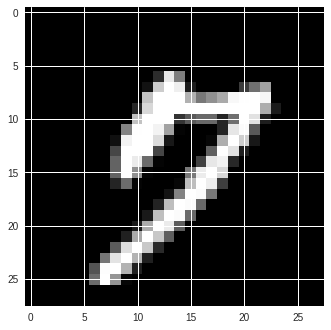

In [0]:
batch_xs, batch_ys = mnist.test.next_batch(1)

with tf.Session() as sess:
    saver.restore(sess, "./logdir/my_model_final.ckpt")
    X_new_scaled=batch_xs
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred=np.argmax(Z, axis=1)
    confidence = sess.run(tf.nn.softmax(Z, axis=1))

print("Prediction: {} | Confidence: {}%".format(y_pred[0],confidence[0][y_pred][0] * 100))
    
two_d = (np.reshape(batch_xs, (28, 28)) * 255).astype(np.uint8)
plt.imshow(two_d, 'gray',interpolation='nearest')
plt.show()